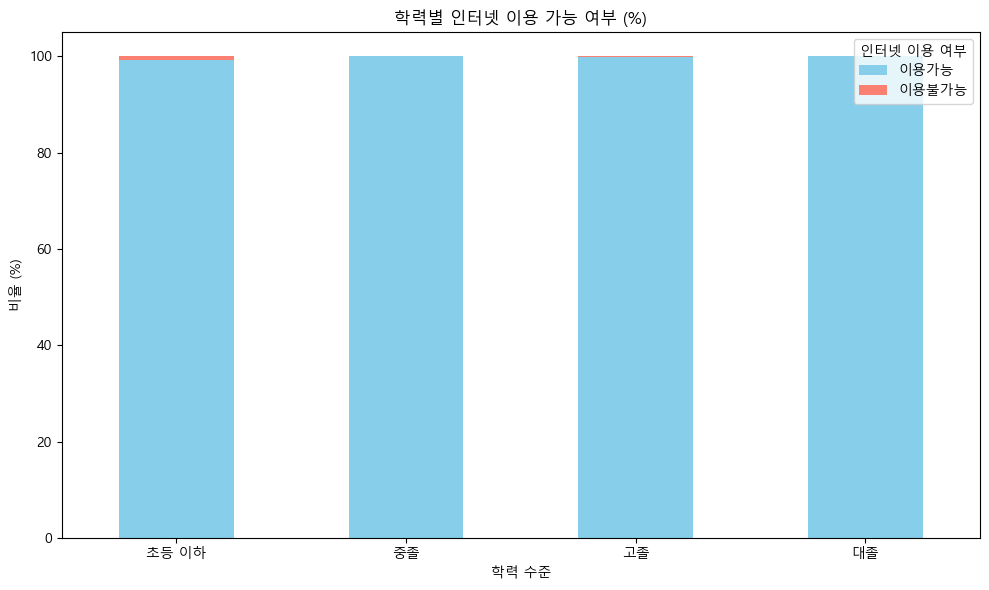

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀 파일 불러오기 (첫 시트 기준)
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')

# 2. G열(6번), M열(12번) 선택
df = df.iloc[:, [6, 12]]
df.columns = ['인터넷이용', '학력']

# 3. 유효값 필터링
df = df[df['인터넷이용'].isin([1, 2]) & df['학력'].isin([1, 2, 3, 4])]

# 4. 학력별 인터넷 이용 비율 계산
pivot = pd.crosstab(df['학력'], df['인터넷이용'], normalize='index') * 100

# 5. 실제 컬럼 값 기준으로 이름 매핑
rename_map = {}
if 1 in pivot.columns:
    rename_map[1] = '이용가능'
if 2 in pivot.columns:
    rename_map[2] = '이용불가능'
pivot.rename(columns=rename_map, inplace=True)

# 6. 학력 인덱스명 지정
pivot.index = ['초등 이하', '중졸', '고졸', '대졸']

# 7. 시각화
pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])
plt.title('학력별 인터넷 이용 가능 여부 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('학력 수준')
plt.xticks(rotation=0)
plt.legend(title='인터넷 이용 여부', loc='upper right')
plt.tight_layout()
plt.show()


In [5]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Windows의 경우: 맑은 고딕 사용
mpl.rc('font', family='Malgun Gothic')

# 마이너스(-) 깨짐 방지
mpl.rcParams['axes.unicode_minus'] = False


<Figure size 1000x600 with 0 Axes>

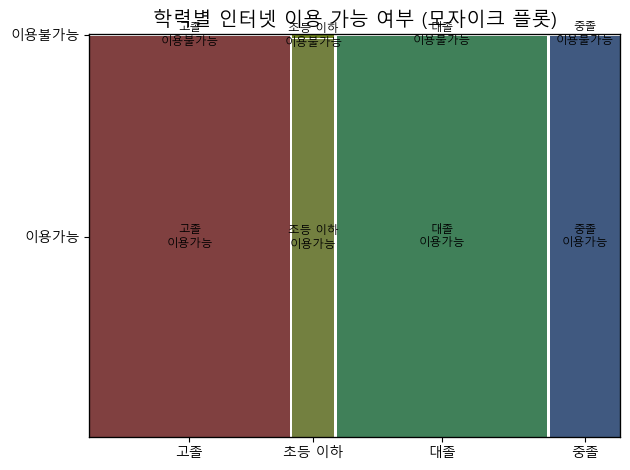

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# 1. 엑셀에서 필요한 열만 추출 (G열=6, M열=12)
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df = df.iloc[:, [6, 12]]
df.columns = ['인터넷이용', '학력']

# 2. 유효값 필터링
df = df[df['인터넷이용'].isin([1, 2]) & df['학력'].isin([1, 2, 3, 4])]

# 3. 값 라벨로 변환 (시각화용)
df['인터넷이용'] = df['인터넷이용'].map({1: '이용가능', 2: '이용불가능'})
df['학력'] = df['학력'].map({
    1: '초등 이하',
    2: '중졸',
    3: '고졸',
    4: '대졸'
})

# 4. 모자이크 플롯 시각화
plt.figure(figsize=(10, 6))
mosaic(df, ['학력', '인터넷이용'])
plt.title('학력별 인터넷 이용 가능 여부 (모자이크 플롯)', fontsize=14)
plt.tight_layout()
plt.show()


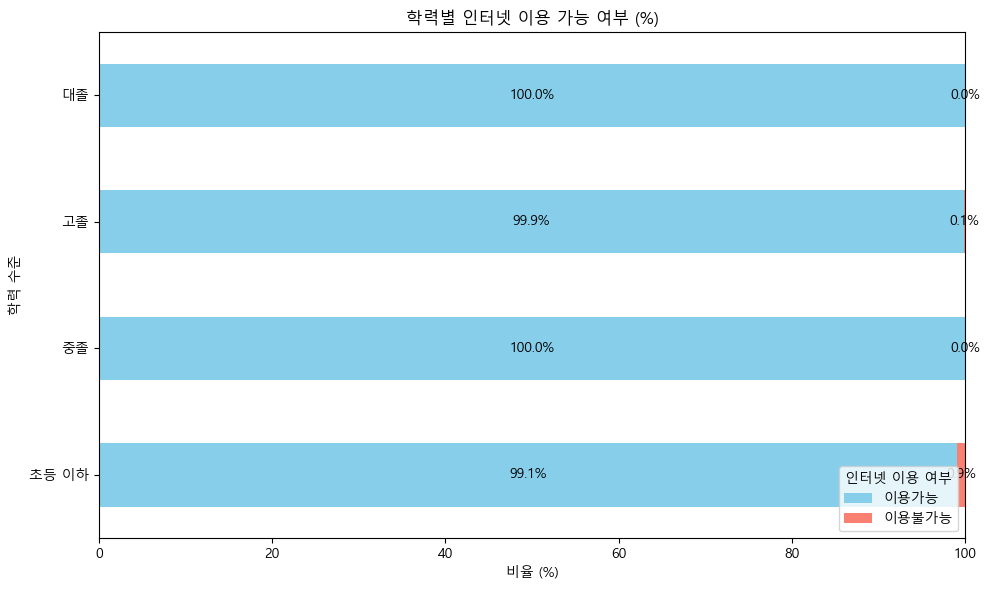

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀 파일 불러오기 (G열=6: 인터넷이용, M열=12: 학력)
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df = df.iloc[:, [6, 12]]
df.columns = ['인터넷이용', '학력']

# 2. 유효 응답 필터링
df = df[df['인터넷이용'].isin([1, 2]) & df['학력'].isin([1, 2, 3, 4])]

# 3. 비율 계산
pivot = pd.crosstab(df['학력'], df['인터넷이용'], normalize='index') * 100

# 4. 컬럼명, 인덱스 라벨 지정
rename_map = {}
if 1 in pivot.columns:
    rename_map[1] = '이용가능'
if 2 in pivot.columns:
    rename_map[2] = '이용불가능'
pivot.rename(columns=rename_map, inplace=True)
pivot.index = ['초등 이하', '중졸', '고졸', '대졸']

# 5. 시각화 - 가로형 누적 막대그래프
ax = pivot.plot(kind='barh', stacked=True, figsize=(10, 6), color=['skyblue', 'salmon'])

# 6. 막대 안에 퍼센트 텍스트 표시
for i, (idx, row) in enumerate(pivot.iterrows()):
    x_pos = 0
    for val in row:
        plt.text(x_pos + val / 2, i, f'{val:.1f}%', va='center', ha='center', fontsize=10)
        x_pos += val

# 7. 스타일링
plt.title('학력별 인터넷 이용 가능 여부 (%)')
plt.xlabel('비율 (%)')
plt.ylabel('학력 수준')
plt.xlim(0, 100)
plt.legend(title='인터넷 이용 여부', loc='lower right')
plt.tight_layout()
plt.show()


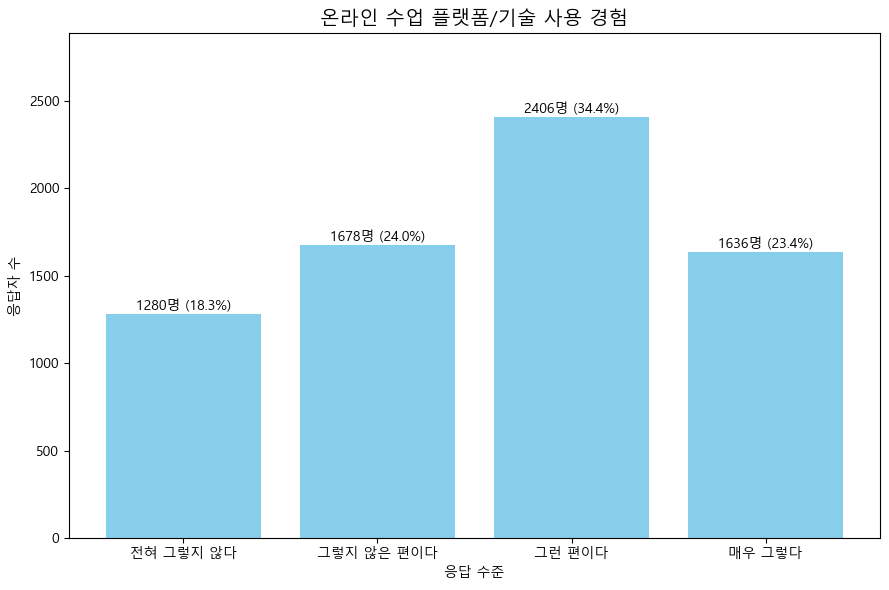

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀에서 J열(Q8_2)만 추출 (열 번호 9)
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df = df.iloc[:, [9]]
df.columns = ['원격회의경험']

# 2. 유효 응답 필터링 (1~4점)
df = df[df['원격회의경험'].isin([1, 2, 3, 4])]

# 3. 라벨 매핑 + 응답 분포 집계
response_map = {
    1: '전혀 그렇지 않다',
    2: '그렇지 않은 편이다',
    3: '그런 편이다',
    4: '매우 그렇다'
}
counts = df['원격회의경험'].map(response_map).value_counts().reindex(response_map.values())
total = counts.sum()
percentages = counts / total * 100

# 4. 시각화
plt.figure(figsize=(9, 6))
bars = plt.bar(counts.index, counts.values, color='skyblue')

# 5. 수치 + 비율 표시
for i, bar in enumerate(bars):
    count = counts.values[i]
    percent = percentages.values[i]
    label = f'{count}명 ({percent:.1f}%)'
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3, label,
             ha='center', va='bottom', fontsize=10)

# 6. 스타일 마무리
plt.title('온라인 수업 플랫폼/기술 사용 경험', fontsize=14)
plt.ylabel('응답자 수')
plt.xlabel('응답 수준')
plt.xticks(rotation=0)
plt.ylim(0, counts.max() * 1.2)  # 여유 공간 확보
plt.tight_layout()
plt.show()


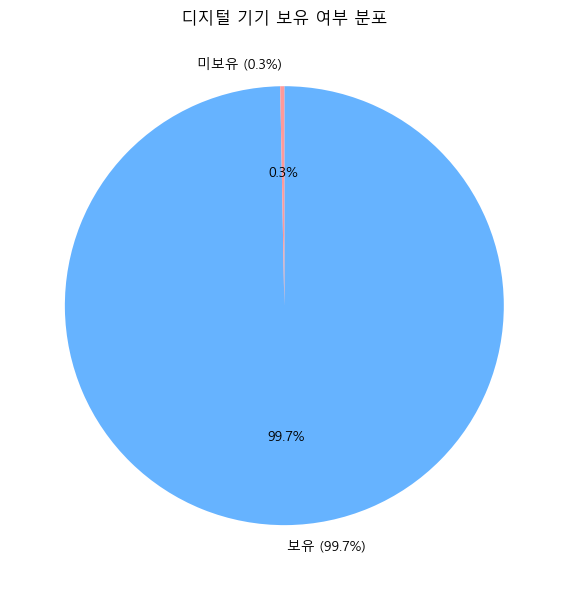

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀에서 C~F열 (2~5번 인덱스) 추출
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df = df.iloc[:, [2, 3, 4, 5]]
df.columns = ['데스크탑', '노트북', '휴대전화', '스마트패드']

# 2. 디지털 기기 보유 여부 판단 함수 (피처폰 제외)
def check_device_ownership(row):
    has_desktop = row['데스크탑'] == 1
    has_laptop = row['노트북'] == 1
    has_phone = row['휴대전화'] == 1  # 1: 스마트폰만 인정
    has_tablet = row['스마트패드'] == 1
    return '보유' if has_desktop or has_laptop or has_phone or has_tablet else '미보유'

df['보유여부'] = df.apply(check_device_ownership, axis=1)

# 3. 분포 계산
counts = df['보유여부'].value_counts()
total = counts.sum()
percentages = counts / total * 100

# 4. 파이차트 시각화
plt.figure(figsize=(6, 6))
plt.pie(
    counts,
    labels=[f'{label} ({percentages[label]:.1f}%)' for label in counts.index],
    autopct='%1.1f%%',
    startangle=90,
    colors=['#66b3ff', '#ff9999'],
    counterclock=False
)
plt.title('디지털 기기 보유 여부 분포')
plt.tight_layout()
plt.show()


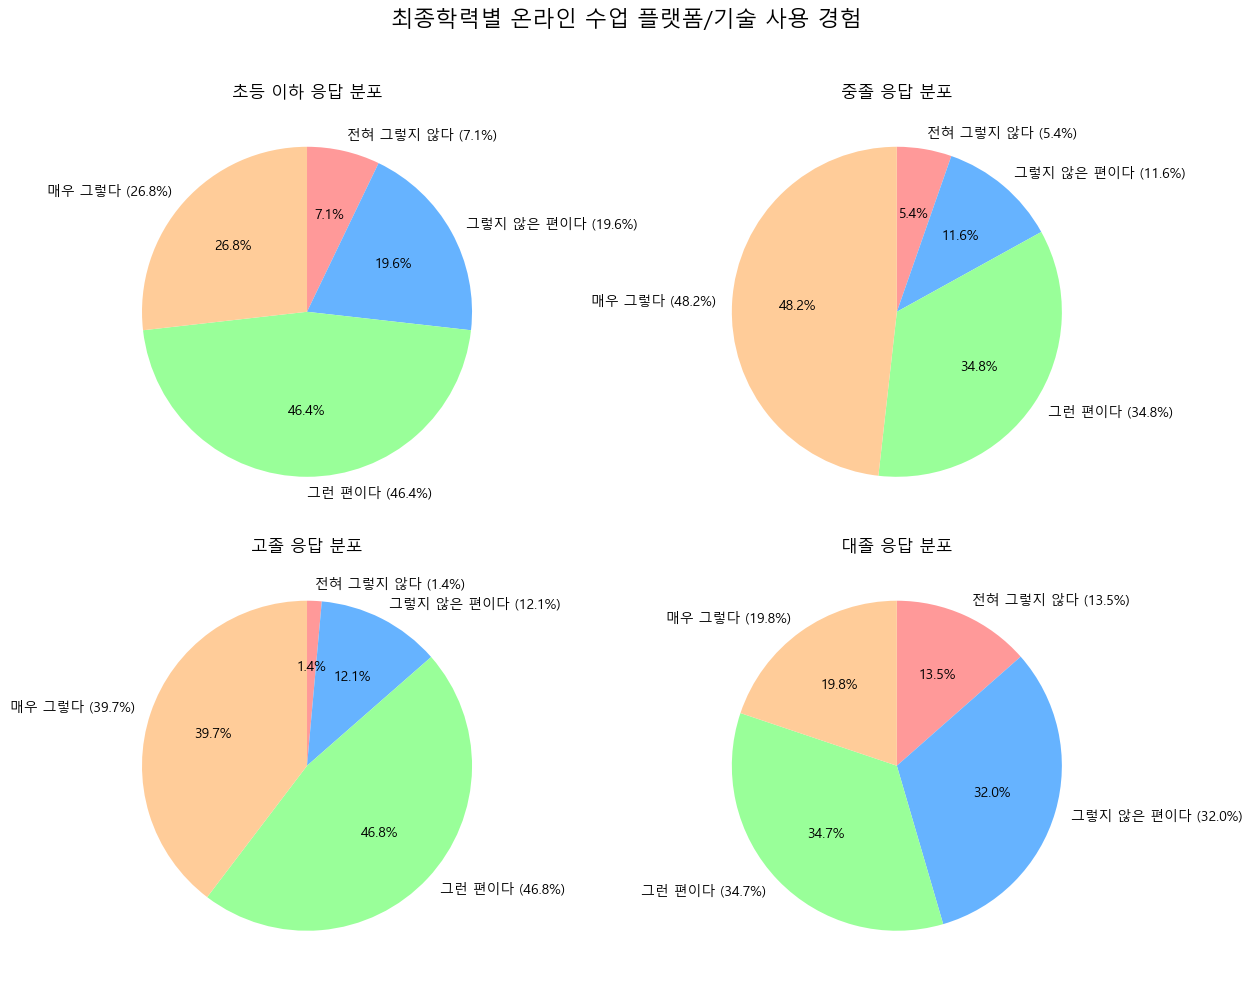

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. 엑셀 불러오기 (Q8_2: 9번, ADQ4: 12번 열)
file_path = 'lowdata.xlsx'
df = pd.read_excel(file_path, sheet_name=0, engine='openpyxl')
df = df.iloc[:, [9, 12]]
df.columns = ['원격회의경험', '학력']

# 2. 유효값 필터링
df = df[df['원격회의경험'].isin([1, 2, 3, 4]) & df['학력'].isin([1, 2, 3, 4])]

# 3. 매핑
exp_map = {
    1: '전혀 그렇지 않다',
    2: '그렇지 않은 편이다',
    3: '그런 편이다',
    4: '매우 그렇다'
}
edu_map = {
    1: '초등 이하',
    2: '중졸',
    3: '고졸',
    4: '대졸'
}
df['원격회의경험'] = df['원격회의경험'].map(exp_map)
df['학력'] = df['학력'].map(edu_map)

# 4. 시각화: 학력별 파이차트
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, edu in enumerate(edu_map.values()):
    subset = df[df['학력'] == edu]['원격회의경험'].value_counts().reindex(exp_map.values(), fill_value=0)
    total = subset.sum()
    labels = [f'{label} ({subset[label]/total*100:.1f}%)' for label in subset.index]

    axes[i].pie(subset, labels=labels, autopct='%1.1f%%', startangle=90, counterclock=False, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
    axes[i].set_title(f'{edu} 응답 분포')

plt.suptitle('최종학력별 온라인 수업 플랫폼/기술 사용 경험', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
#1234